# Feature Selection Pobreza - Agregações GR.xlsx 
- Carregando o arquivo, separando as planilhas do Excel e preparando o ambiente

In [2]:
#Requisito para leitura de binários 
#Não é necessário nesse arquivo por enquanto
!pip install pyxlsb 

## Entendendo Mais a Base IPEA

In [3]:
import pandas as pd

# Carregar o arquivo de dados
data_filepath = r'C:\Users\claud\OneDrive\Área de Trabalho\Trabalho Interdisciplinar\Trabalho semestral documentos\Pobreza no Brasil\Dados para competição_V1_PauloFernando\Agregações GR.xlsx'
data_df = pd.read_excel(data_filepath)

# Carregar o dicionário de variáveis
dict_filepath = r'C:\Users\claud\OneDrive\Área de Trabalho\Trabalho Interdisciplinar\Trabalho semestral documentos\Pobreza no Brasil\Dados para competição_V1_PauloFernando\Dicionário de variáveis.xlsx'
dict_df = pd.read_excel(dict_filepath)

# Mostrar as primeiras linhas de cada arquivo para ter uma visão geral
data_preview = data_df.head()
dict_preview = dict_df.head()

print(data_preview) 
print(dict_preview)


   cod_mun                nom_mun  cod_regiao  cod_uf  qtd_dom  \
0  1100015  Alta Floresta D'Oeste           1      11   7443.0   
1  1100023              Ariquemes           1      11  27654.0   
2  1100031                 Cabixi           1      11   1979.0   
3  1100049                 Cacoal           1      11  24413.0   
4  1100056             Cerejeiras           1      11   5399.0   

   qtd_dom_pobres  qtd_dom_vulneraveis  qtd_dom_pob_vul  qtd_pes  \
0     4815.110866          1378.041441      6193.152307  24392.0   
1    11601.470928          6327.880993     17929.351921  90353.0   
2     1280.951291           468.406271      1749.357562   6313.0   
3     6993.735293          3929.625264     10923.360558  78574.0   
4     2982.974817          1054.726046      4037.700863  17029.0   

   qtd_pes_pobres  ...  contr_T2   contr_T3   contr_P1  contr_P2   contr_P3  \
0    17426.222018  ...  1.458822  10.331535  12.250263  3.101195  13.260453   
1    44172.856817  ...  1.979498  13

In [4]:
# Listar as planilhas disponíveis no arquivo Excel
sheet_names = pd.ExcelFile(data_filepath).sheet_names

# Carregar a planilha de "municípios" se disponível
if 'Municipios' in sheet_names:
    mun_df = pd.read_excel(data_filepath, sheet_name='Municipios')
    municipalities_preview = mun_df.head()
else:
    municipalities_preview = "A planilha 'Municipios' não foi encontrada no arquivo."

municipalities_preview


,cod_mun,nom_mun,cod_regiao,cod_uf,qtd_dom,qtd_dom_pobres,qtd_dom_vulneraveis,qtd_dom_pob_vul,qtd_pes,qtd_pes_pobres,...,contr_T2,contr_T3,contr_P1,contr_P2,contr_P3,contr_P4,num_idhm,num_ivs,num_ibeu,num_renda
0,1100015,Alta Floresta D'Oeste,1,11,7443.0,4815.110866,1378.041441,6193.152307,24392.0,17426.222018,...,1.458822,10.331535,12.250263,3.101195,13.260453,3.487523,0.641,0.376,0.625,548.809498
1,1100023,Ariquemes,1,11,27654.0,11601.470928,6327.880993,17929.351921,90353.0,44172.856817,...,1.979498,13.575718,10.907053,4.653805,12.506057,2.015588,0.702,0.268,0.709,762.672776
2,1100031,Cabixi,1,11,1979.0,1280.951291,468.406271,1749.357562,6313.0,4459.568118,...,0.796450,11.166553,11.696466,2.517816,14.098967,2.134615,0.650,0.300,0.665,523.394761
3,1100049,Cacoal,1,11,24413.0,6993.735293,3929.625264,10923.360558,78574.0,26757.319951,...,2.212722,11.999772,10.875981,3.901138,11.589410,3.029373,0.718,0.255,0.776,825.929402
4,1100056,Cerejeiras,1,11,5399.0,2982.974817,1054.726046,4037.700863,17029.0,10345.154932,...,2.101833,12.350372,13.383966,2.437176,13.601732,2.080656,0.692,0.280,0.674,629.383679


## Verificando Registros
- Registros estão perfeitamente preenchidos
- Praticamente todos os registros são numéricos
- Os registros da base de dados de probreza foram tirados do "Atlas" - Censo 

In [7]:
mun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cod_mun               5565 non-null   int64  
 1   nom_mun               5565 non-null   object 
 2   cod_regiao            5565 non-null   int64  
 3   cod_uf                5565 non-null   int64  
 4   qtd_dom               5565 non-null   float64
 5   qtd_dom_pobres        5565 non-null   float64
 6   qtd_dom_vulneraveis   5565 non-null   float64
 7   qtd_dom_pob_vul       5565 non-null   float64
 8   qtd_pes               5565 non-null   float64
 9   qtd_pes_pobres        5565 non-null   float64
 10  qtd_pes_vulneraveis   5565 non-null   float64
 11  qtd_pes_pob_vul       5565 non-null   float64
 12  qtd_0a11              5565 non-null   float64
 13  qtd_0a11_pobres       5565 non-null   float64
 14  qtd_0a11_vulneraveis  5565 non-null   float64
 15  qtd_0a11_pob_vul     

### Entendendo Distribuição de Dados

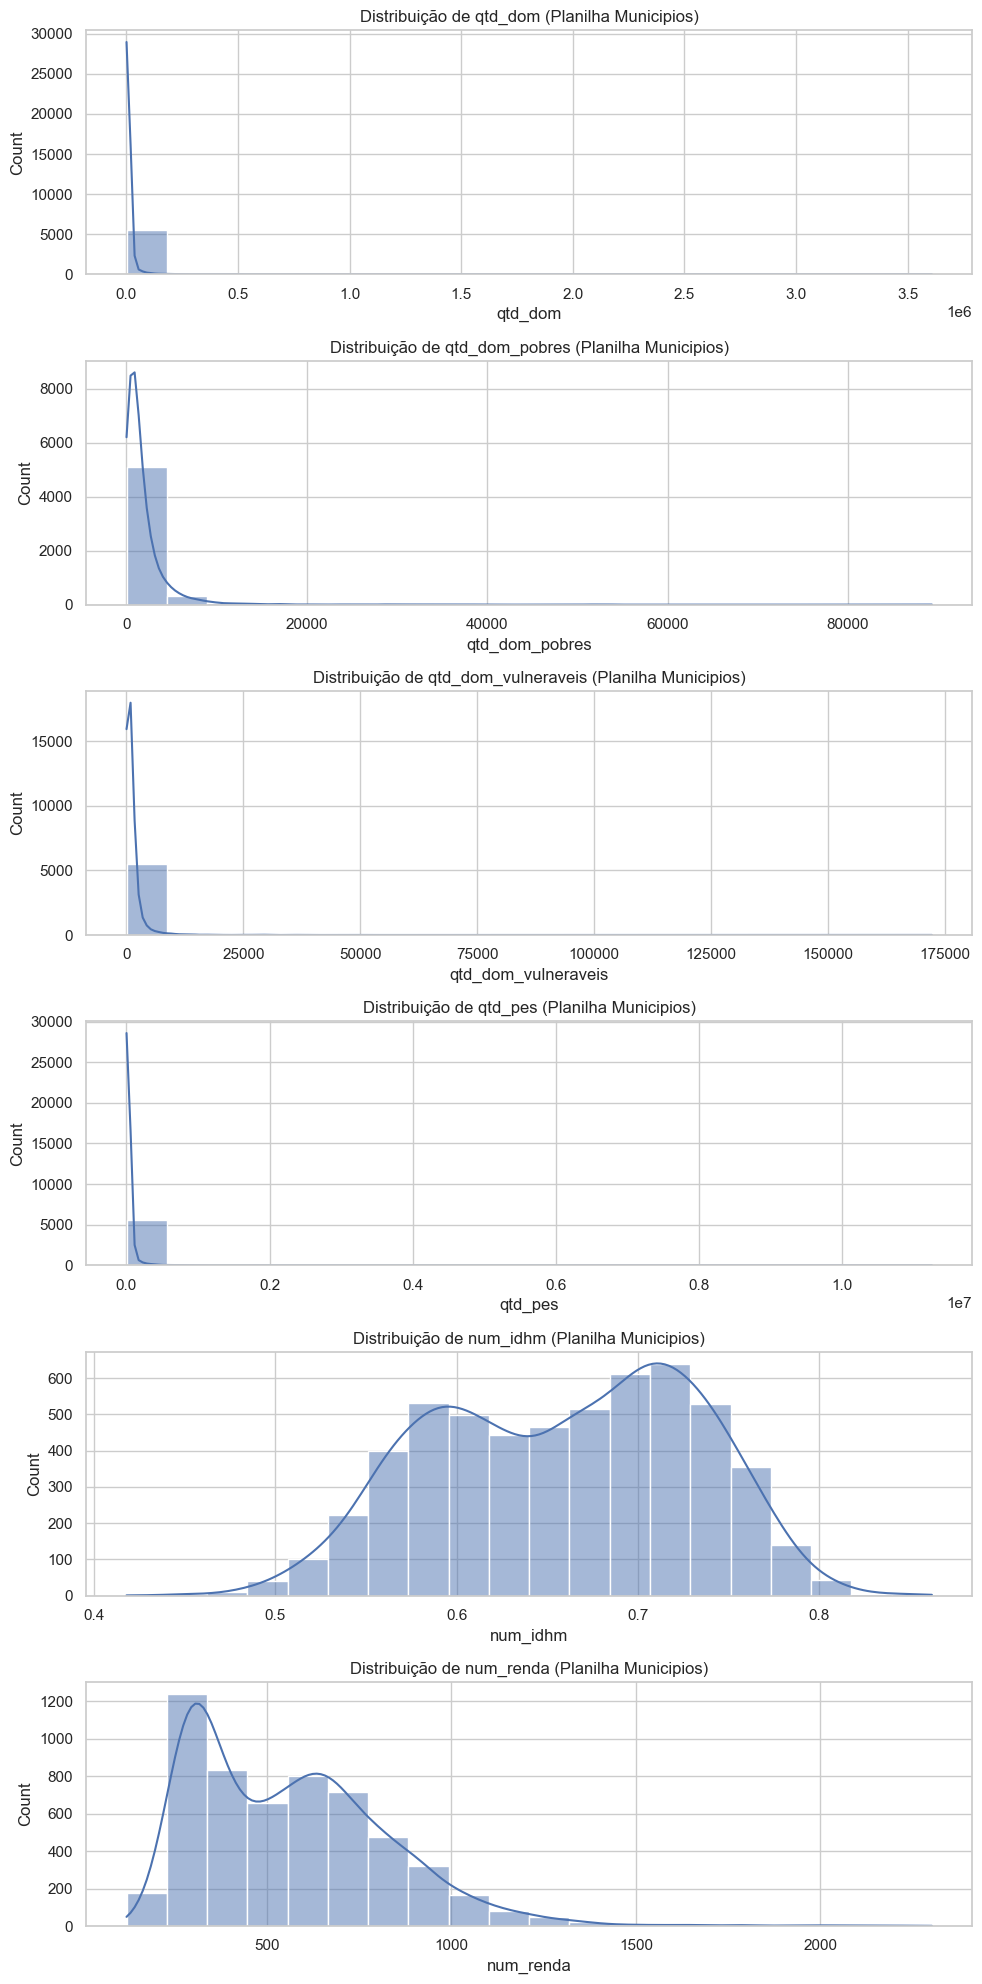

(            cod_mun   cod_regiao       cod_uf       qtd_dom  qtd_dom_pobres  \
 count  5.565000e+03  5565.000000  5565.000000   5565.000000     5565.000000   
 mean   3.253053e+06     2.897215    32.372327  10431.527224     1838.151384   
 std    9.845215e+05     1.087740     9.829957  65429.496593     3723.976569   
 min    1.100015e+06     1.000000    11.000000    239.000000        6.162756   
 25%    2.512101e+06     2.000000    25.000000   1598.000000      453.015423   
 
        qtd_dom_vulneraveis  qtd_dom_pob_vul        qtd_pes  qtd_pes_pobres  \
 count          5565.000000      5565.000000    5565.000000     5565.000000   
 mean           1268.126641      3106.278025   34277.771608     8071.570183   
 std            4280.097518      7777.072679  203112.622424    18101.252728   
 min              15.328427        21.491183     805.000000       28.486364   
 25%             286.602078       778.981081    5235.000000     1752.951431   
 
        qtd_pes_vulneraveis  ...     contr

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Settando estilo e separando as colunas escolhidas
sns.set(style="whitegrid")
selected_columns = ['qtd_dom', 'qtd_dom_pobres', 'qtd_dom_vulneraveis', 'qtd_pes', 'num_idhm', 'num_renda']

# Sumário estatístico da planilha "Municipios"
mun_summary_stats = mun_df.describe()

# Verificação de dados faltantes na planilha "Municipios"
mun_missing_data = mun_df.isnull().sum()

# Selecionar algumas variáveis numéricas para visualização (usaremos as mesmas selecionadas anteriormente)
# Histogramas
fig, axes = plt.subplots(len(selected_columns), 1, figsize=(10, 20))

for i, col in enumerate(selected_columns):
    sns.histplot(mun_df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribuição de {col} (Planilha Municipios)')

plt.tight_layout()
plt.show()

mun_summary_stats.head(), mun_missing_data[selected_columns]


#### As observações a partir dos gráficos:

1. `qtd_dom`, `qtd_dom_pobres`, `qtd_dom_vulneraveis`, `qtd_pes`: Essas variáveis têm distribuições assimétricas à esquerda. Maior concentração de valores baixos, indicando que a maioria dos municípios tem menos domicílios e população.
2. `num_idhm`: Distribuição mais uniforme, mas com alguma concentração em torno de valores mais altos, sugerindo um nível de desenvolvimento humano geralmente mais elevado.
3. `num_renda`: Assimetria à esquerda, a maioria dos municípios tem renda média mais baixa, com alguns outliers de renda mais alta.

### Preparar o Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Verificar se as variáveis alvo 'qtd_0a11_pobres' e 'qtd_0a11_vulneraveis' existem no DataFrame
if 'qtd_0a11_pobres' in mun_df.columns and 'qtd_0a11_vulneraveis' in mun_df.columns:
    
    # Eliminar registros com valores nulos nas colunas alvo
    mun_df.dropna(subset=['qtd_0a11_pobres', 'qtd_0a11_vulneraveis'], inplace=True)
    
    # Definir X e y
    X = mun_df.drop(['qtd_0a11_pobres', 'qtd_0a11_vulneraveis'], axis=1).select_dtypes(include=['float64', 'int64'])
    y = mun_df[['qtd_0a11_pobres', 'qtd_0a11_vulneraveis']]
    
    # Dividir o conjunto de dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Normalizar os dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    preparation_summary = "Dados preparados e normalizados. Conjuntos de treino e teste criados."
else:
    preparation_summary = "As variáveis alvo 'qtd_0a11_pobres' e 'qtd_0a11_vulneraveis' não foram encontradas no DataFrame."

preparation_summary

'Dados preparados e normalizados. Conjuntos de treino e teste criados.'

### Seleção de Características Modelo Multi-OutPut

In [10]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Seleção de Características para cada variável alvo
# Usaremos as características selecionadas para o modelo multi-output
selected_features_per_target = {}

for target in ['qtd_0a11_pobres', 'qtd_0a11_vulneraveis']:
    selector = SelectKBest(score_func=f_regression, k=10)
    selector.fit(X_train_scaled, y_train[target])
    selected_features = X.columns[selector.get_support(indices=True)]
    selected_features_per_target[target] = selected_features

# Unindo as características selecionadas para ambos os alvos
final_selected_features = list(set(selected_features_per_target['qtd_0a11_pobres']) | 
                               set(selected_features_per_target['qtd_0a11_vulneraveis']))

# Filtrando os conjuntos de treino e teste com as características selecionadas
X_train_final = X_train[final_selected_features]
X_test_final = X_test[final_selected_features]

# Normalização
scaler = StandardScaler()
X_train_final_scaled = scaler.fit_transform(X_train_final)
X_test_final_scaled = scaler.transform(X_test_final)

# 2. Modelagem Multi-Output
multi_output_model = MultiOutputRegressor(LinearRegression())
multi_output_model.fit(X_train_final_scaled, y_train)

# 3. Avaliação de Modelo
y_pred = multi_output_model.predict(X_test_final_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

final_selected_features, rmse


(['qtd_dom_E2',
  'qtd_dom',
  'qtd_0a11',
  'qtd_0a11_pob_vul',
  'qtd_dom_P3',
  'qtd_dom_E3',
  'qtd_pes_vulneraveis',
  'qtd_pes_pobres',
  'qtd_dom_T3',
  'qtd_pes_pob_vul',
  'qtd_dom_vulneraveis',
  'qtd_dom_pobres',
  'qtd_dom_E1',
  'qtd_dom_P2',
  'qtd_dom_pob_vul',
  'qtd_dom_T2',
  'qtd_pes'],
 127.80249945769843)

### Resultados:

1. **Seleção de Características**: As características selecionadas para os modelos multi-output são as seguintes: 
    - 'qtd_pes_vulneraveis', 'qtd_dom', 'qtd_dom_T2', 'qtd_pes', 'qtd_0a11', 'qtd_dom_T3', 'qtd_dom_P3', 'qtd_pes_pobres', 'qtd_dom_E2', 'qtd_dom_E1', 'qtd_dom_pob_vul', 'qtd_dom_pobres', 'qtd_pes_pob_vul', 'qtd_dom_E3', 'qtd_dom_P2', 'qtd_dom_vulneraveis', 'qtd_0a11_pob_vul'.
2. **Modelagem**: Usei um modelo de Regressão Linear encapsulado em um estimador multi-output para ajustar aos dados de treino.
3. **Avaliação de Modelo**: O erro quadrático médio da raiz (RMSE) para o modelo é aproximadamente 127